<h1>PART-1</h1>

In [1]:
import pandas as pd
import numpy as np
fx = pd.read_csv("data_safe_copy.csv")

fx["Date"] = pd.to_datetime(fx["Date"])

fx.set_index("Date", inplace=True)

fx

fx = fx.sort_index()
#  Confirm the index is sorted in ascending order and that all rate columns are numeric
a = fx.index.sort_values()

all(a == fx.index)

list_of_col = fx.columns.to_list()

for col in list_of_col:
    print(np.issubdtype(fx[col].dtype, np.number))

print(fx[:5])
print(fx[-5:])

True
True
True
True
True
True
True
True
True
True
True
             EURUSD   GBPUSD    PLNUSD   USDPLN    USDJPY   AUDUSD   NZDUSD  \
Date                                                                          
2025-01-02  1.02661  1.23826  0.240270  4.16199  157.4610  0.62033  0.55966   
2025-01-03  1.03062  1.24267  0.241453  4.14160  157.3420  0.62176  0.56089   
2025-01-06  1.03900  1.25188  0.244290  4.09350  157.6200  0.62427  0.56402   
2025-01-07  1.03426  1.24771  0.242804  4.11855  158.0405  0.62326  0.56331   
2025-01-08  1.03185  1.23638  0.241377  4.14290  158.3085  0.62132  0.56058   

             USDCAD   USDCHF   EURPLN   GBPPLN  
Date                                            
2025-01-02  1.44067  0.91210  4.27274  5.15363  
2025-01-03  1.44467  0.90891  4.26841  5.14664  
2025-01-06  1.43330  0.90478  4.25315  5.12457  
2025-01-07  1.43683  0.90937  4.25965  5.13875  
2025-01-08  1.43758  0.91101  4.27485  5.12220  
             EURUSD   GBPUSD    PLNUSD   USDPLN 

<h1>PART-2</h1>

<Axes: title={'center': 'EURUSD Exchange Rate Over Time'}, xlabel='Date'>

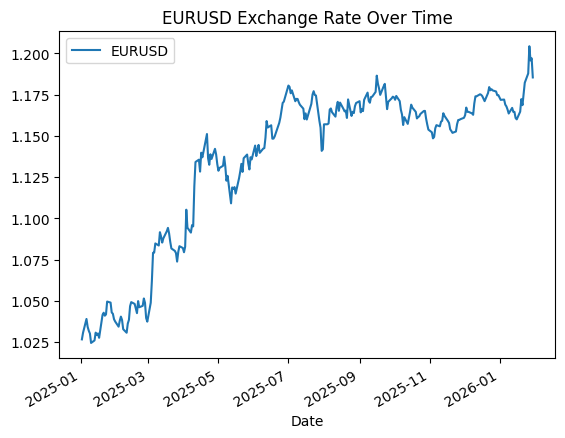

In [2]:
fx["EURUSD"].plot(title="EURUSD Exchange Rate Over Time", xlabel = "Date" ,legend=True)



<Axes: title={'center': 'USDCHF Exchange Rate Over Time'}, xlabel='Date'>

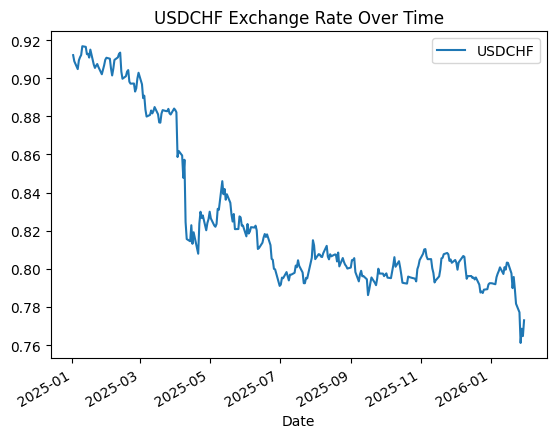

In [3]:
fx["USDCHF"].plot(title="USDCHF Exchange Rate Over Time", xlabel = "Date" ,legend=True)


<Axes: title={'center': 'Curancy'}, xlabel='Date'>

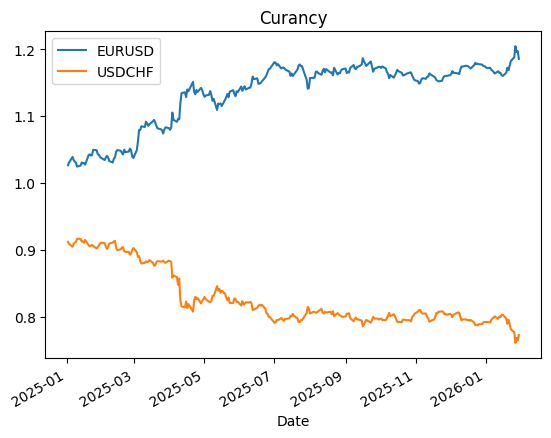

In [4]:
fx[["EURUSD", "USDCHF"]].plot(title="Curancy", xlabel = "Date" ,legend=True)

<h1>PART-3</h1>

In [5]:
EURUSD_roll_mean = fx["EURUSD"].rolling(7).mean()
EURUSD_roll_std = fx["EURUSD"].rolling(7).std()

USDCHF_roll_mean = fx["USDCHF"].rolling(7).mean()
USDCHF_roll_std = fx["USDCHF"].rolling(7).std()

print(EURUSD_roll_mean[:10])



print("Is missing values appear only where the window is incomplete:",bool((EURUSD_roll_mean[:6].isna().all()) and (EURUSD_roll_mean[6:].notna().all())))


Date
2025-01-02         NaN
2025-01-03         NaN
2025-01-06         NaN
2025-01-07         NaN
2025-01-08         NaN
2025-01-09         NaN
2025-01-10    1.030991
2025-01-13    1.030900
2025-01-14    1.030911
2025-01-15    1.029531
Name: EURUSD, dtype: float64
Is missing values appear only where the window is incomplete: True


<h1>PART-4</h1>

In [6]:
# fs["baseline_pred_EURUSD"] = fs["EURUSD"].rolling(window=2).sum() - fs["EURUSD"]


fx["baseline_pred_EURUSD"] = fx["EURUSD"].shift(1)

fx["absolute_error_EURUSD"] = abs(fx["EURUSD"]-fx["baseline_pred_EURUSD"])

print(float(fx["absolute_error_EURUSD"].mean()))

non_missing_preds = fx["baseline_pred_EURUSD"].notna().sum()
expected_preds = len(fx) - 1

print("Validation passed:", non_missing_preds == expected_preds)

0.004069426523297489
Validation passed: True


<h1>PART-5</h1>

In [7]:
pair1 = "EURUSD"
pair2 = "USDCHF"
rolling_window = 7

fx["baseline_pred_EURUSD"] = fx["EURUSD"].shift(1)
fx["absolute_error_EURUSD"] = (fx["EURUSD"] - fx["baseline_pred_EURUSD"]).abs()
mae = fx["absolute_error_EURUSD"].mean()

non_missing_preds = fx["baseline_pred_EURUSD"].notna().sum()
expected_preds = len(fx) - 1

report = {
    "currency_pair_1": pair1,
    "currency_pair_2": pair2,
    "rolling_window_size": rolling_window,
    "baseline_mae_EURUSD": mae,
    "start_date": fx.index.min(),
    "end_date": fx.index.max()
}

print(report)
print(rolling_window == report["rolling_window_size"])
print(non_missing_preds == expected_preds)

{'currency_pair_1': 'EURUSD', 'currency_pair_2': 'USDCHF', 'rolling_window_size': 7, 'baseline_mae_EURUSD': np.float64(0.004069426523297489), 'start_date': Timestamp('2025-01-02 00:00:00'), 'end_date': Timestamp('2026-01-30 00:00:00')}
True
True
